## Project Phase 1 - Data Set Selection and Preparation

In [1]:
import pandas as pd
import sys
import time
from pathlib import Path
import os
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

#### Set up for imports of .py modules by adding path to sys.path

In [2]:
path = Path(os.getcwd())
path = str(path)
print(path)
sys.path.insert(1, path)

/Users/leon/Sync/Documents/NEU/DS5230/Project/Gesture-Recognization-Reading-Muscle-Activity


In [3]:
import utils.general_utils as general_utils

#### Set up to time script run time

In [4]:
start = time.time()

#### Define parameters

In [5]:
path_to_data_0 = 'data/0.csv'
path_to_data_1 = 'data/1.csv'
path_to_data_2 = 'data/2.csv'
path_to_data_3 = 'data/3.csv'

path_to_target_df = 'data/emg_target.csv'
path_to_design_df = 'data/emg_design.csv'

target_attr = 'gesture class (0-3)'

#### Define attribute names

In [6]:
attr_names = []
for i in range(1, 9):
    for j in range(1, 9):
        attr_names.append(f'muscle reading {i} sensor {j}')
attr_names.append(target_attr)
attr_names

['muscle reading 1 sensor 1',
 'muscle reading 1 sensor 2',
 'muscle reading 1 sensor 3',
 'muscle reading 1 sensor 4',
 'muscle reading 1 sensor 5',
 'muscle reading 1 sensor 6',
 'muscle reading 1 sensor 7',
 'muscle reading 1 sensor 8',
 'muscle reading 2 sensor 1',
 'muscle reading 2 sensor 2',
 'muscle reading 2 sensor 3',
 'muscle reading 2 sensor 4',
 'muscle reading 2 sensor 5',
 'muscle reading 2 sensor 6',
 'muscle reading 2 sensor 7',
 'muscle reading 2 sensor 8',
 'muscle reading 3 sensor 1',
 'muscle reading 3 sensor 2',
 'muscle reading 3 sensor 3',
 'muscle reading 3 sensor 4',
 'muscle reading 3 sensor 5',
 'muscle reading 3 sensor 6',
 'muscle reading 3 sensor 7',
 'muscle reading 3 sensor 8',
 'muscle reading 4 sensor 1',
 'muscle reading 4 sensor 2',
 'muscle reading 4 sensor 3',
 'muscle reading 4 sensor 4',
 'muscle reading 4 sensor 5',
 'muscle reading 4 sensor 6',
 'muscle reading 4 sensor 7',
 'muscle reading 4 sensor 8',
 'muscle reading 5 sensor 1',
 'muscle r

#### Import and integrate separated data files

In [7]:
df_0 = pd.read_csv(path_to_data_0, header=None)
df_1 = pd.read_csv(path_to_data_1, header=None)
df_2 = pd.read_csv(path_to_data_2, header=None)
df_3 = pd.read_csv(path_to_data_3, header=None)

df = pd.concat([df_0, df_1, df_2, df_3], axis=0)
df.columns = attr_names

print(df.shape)
df.head()

(11678, 65)


,muscle reading 1 sensor 1,muscle reading 1 sensor 2,muscle reading 1 sensor 3,muscle reading 1 sensor 4,muscle reading 1 sensor 5,muscle reading 1 sensor 6,muscle reading 1 sensor 7,muscle reading 1 sensor 8,muscle reading 2 sensor 1,muscle reading 2 sensor 2,...,muscle reading 7 sensor 8,muscle reading 8 sensor 1,muscle reading 8 sensor 2,muscle reading 8 sensor 3,muscle reading 8 sensor 4,muscle reading 8 sensor 5,muscle reading 8 sensor 6,muscle reading 8 sensor 7,muscle reading 8 sensor 8,gesture class (0-3)
0,26.0,4.0,5.0,8.0,-1.0,-13.0,-109.0,-66.0,-9.0,2.0,...,-28.0,61.0,4.0,8.0,5.0,4.0,-7.0,-59.0,16.0,0
1,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,...,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,0
2,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,...,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0,0
3,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,...,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0,0
4,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,...,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0,0


#### Drop observations with nans in the target attribute

In [8]:
print(df.shape)
df = df.dropna(subset=target_attr)
print(df.shape)

(11678, 65)
(11678, 65)


#### Check for id attribute

In [9]:
concern_list = general_utils.check_for_complete_unique_attrs(df)
print(f'\nconcern_list:\n{concern_list}', sep='')

the data frame has 11678 rows

muscle reading 1 sensor 1 has 191 unique values and is dtype float64 
muscle reading 1 sensor 2 has 154 unique values and is dtype float64 
muscle reading 1 sensor 3 has 61 unique values and is dtype float64 
muscle reading 1 sensor 4 has 102 unique values and is dtype float64 
muscle reading 1 sensor 5 has 161 unique values and is dtype float64 
muscle reading 1 sensor 6 has 213 unique values and is dtype float64 
muscle reading 1 sensor 7 has 246 unique values and is dtype float64 
muscle reading 1 sensor 8 has 177 unique values and is dtype float64 
muscle reading 2 sensor 1 has 184 unique values and is dtype float64 
muscle reading 2 sensor 2 has 149 unique values and is dtype float64 
muscle reading 2 sensor 3 has 62 unique values and is dtype float64 
muscle reading 2 sensor 4 has 97 unique values and is dtype float64 
muscle reading 2 sensor 5 has 159 unique values and is dtype float64 
muscle reading 2 sensor 6 has 211 unique values and is dtype f

#### There is no id attribute so create one then rearrange columns so that id is the first column

In [10]:
df['id'] = range(0, df.shape[0])
column_names = attr_names.copy()
column_names.insert(0, 'id')
df = df[column_names]
df.head()

,id,muscle reading 1 sensor 1,muscle reading 1 sensor 2,muscle reading 1 sensor 3,muscle reading 1 sensor 4,muscle reading 1 sensor 5,muscle reading 1 sensor 6,muscle reading 1 sensor 7,muscle reading 1 sensor 8,muscle reading 2 sensor 1,...,muscle reading 7 sensor 8,muscle reading 8 sensor 1,muscle reading 8 sensor 2,muscle reading 8 sensor 3,muscle reading 8 sensor 4,muscle reading 8 sensor 5,muscle reading 8 sensor 6,muscle reading 8 sensor 7,muscle reading 8 sensor 8,gesture class (0-3)
0,0,26.0,4.0,5.0,8.0,-1.0,-13.0,-109.0,-66.0,-9.0,...,-28.0,61.0,4.0,8.0,5.0,4.0,-7.0,-59.0,16.0,0
1,1,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,...,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,0
2,2,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,...,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0,0
3,3,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,...,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0,0
4,4,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,...,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0,0


#### Copy the id attribute and the target vector attribute to a target data frame

In [11]:
target_df = df[['id', target_attr]].copy()
target_df.head()

,id,gesture class (0-3)
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


#### Convert target_attr in the target attribute data frame to a numerical encoding

In [12]:
if pd.api.types.infer_dtype(df[target_attr]) == 'string':
    target_df, le_name_mapping = general_utils.label_binarize_(target_df, target_attr, print_results=True)
else:
    print(f'df[target_attr] is not a string attribute')

df[target_attr] is not a string attribute


#### Save the target data frame

In [13]:
target_df.to_csv(path_to_target_df, index=False)

#### Drop target attribute from the original data frame and save it

In [14]:
df = df.drop(columns=target_attr)
df.head()

,id,muscle reading 1 sensor 1,muscle reading 1 sensor 2,muscle reading 1 sensor 3,muscle reading 1 sensor 4,muscle reading 1 sensor 5,muscle reading 1 sensor 6,muscle reading 1 sensor 7,muscle reading 1 sensor 8,muscle reading 2 sensor 1,...,muscle reading 7 sensor 7,muscle reading 7 sensor 8,muscle reading 8 sensor 1,muscle reading 8 sensor 2,muscle reading 8 sensor 3,muscle reading 8 sensor 4,muscle reading 8 sensor 5,muscle reading 8 sensor 6,muscle reading 8 sensor 7,muscle reading 8 sensor 8
0,0,26.0,4.0,5.0,8.0,-1.0,-13.0,-109.0,-66.0,-9.0,...,21.0,-28.0,61.0,4.0,8.0,5.0,4.0,-7.0,-59.0,16.0
1,1,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,...,-105.0,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0
2,2,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,...,-128.0,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0
3,3,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,...,-54.0,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0
4,4,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,...,60.0,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0


In [15]:
df.to_csv(path_to_design_df, index=False)

#### Get data set size of the design matrix data frame

In [16]:
df.shape

(11678, 65)

#### Get attribute types of the design matrix data frame

In [17]:
df.dtypes

id                             int64
muscle reading 1 sensor 1    float64
muscle reading 1 sensor 2    float64
muscle reading 1 sensor 3    float64
muscle reading 1 sensor 4    float64
                              ...   
muscle reading 8 sensor 4    float64
muscle reading 8 sensor 5    float64
muscle reading 8 sensor 6    float64
muscle reading 8 sensor 7    float64
muscle reading 8 sensor 8    float64
Length: 65, dtype: object

#### Get missingness of the design matrix data frame

In [18]:
df.isna().sum().sum()

0

In [19]:
df.isna().sum()/df.shape[0]

id                           0.0
muscle reading 1 sensor 1    0.0
muscle reading 1 sensor 2    0.0
muscle reading 1 sensor 3    0.0
muscle reading 1 sensor 4    0.0
                            ... 
muscle reading 8 sensor 4    0.0
muscle reading 8 sensor 5    0.0
muscle reading 8 sensor 6    0.0
muscle reading 8 sensor 7    0.0
muscle reading 8 sensor 8    0.0
Length: 65, dtype: float64

#### Visualize missingness of the design matrix data frame

There is no missing values in all attributes, so we will skip this step.

#### Plot the pair plots for the attributes in the design matrix data frame

Considering the large number of attributes, pair plots is not suitable to reveal any meaningful information here.

#### Plot the histograms for the attributes in the design matrix data frame

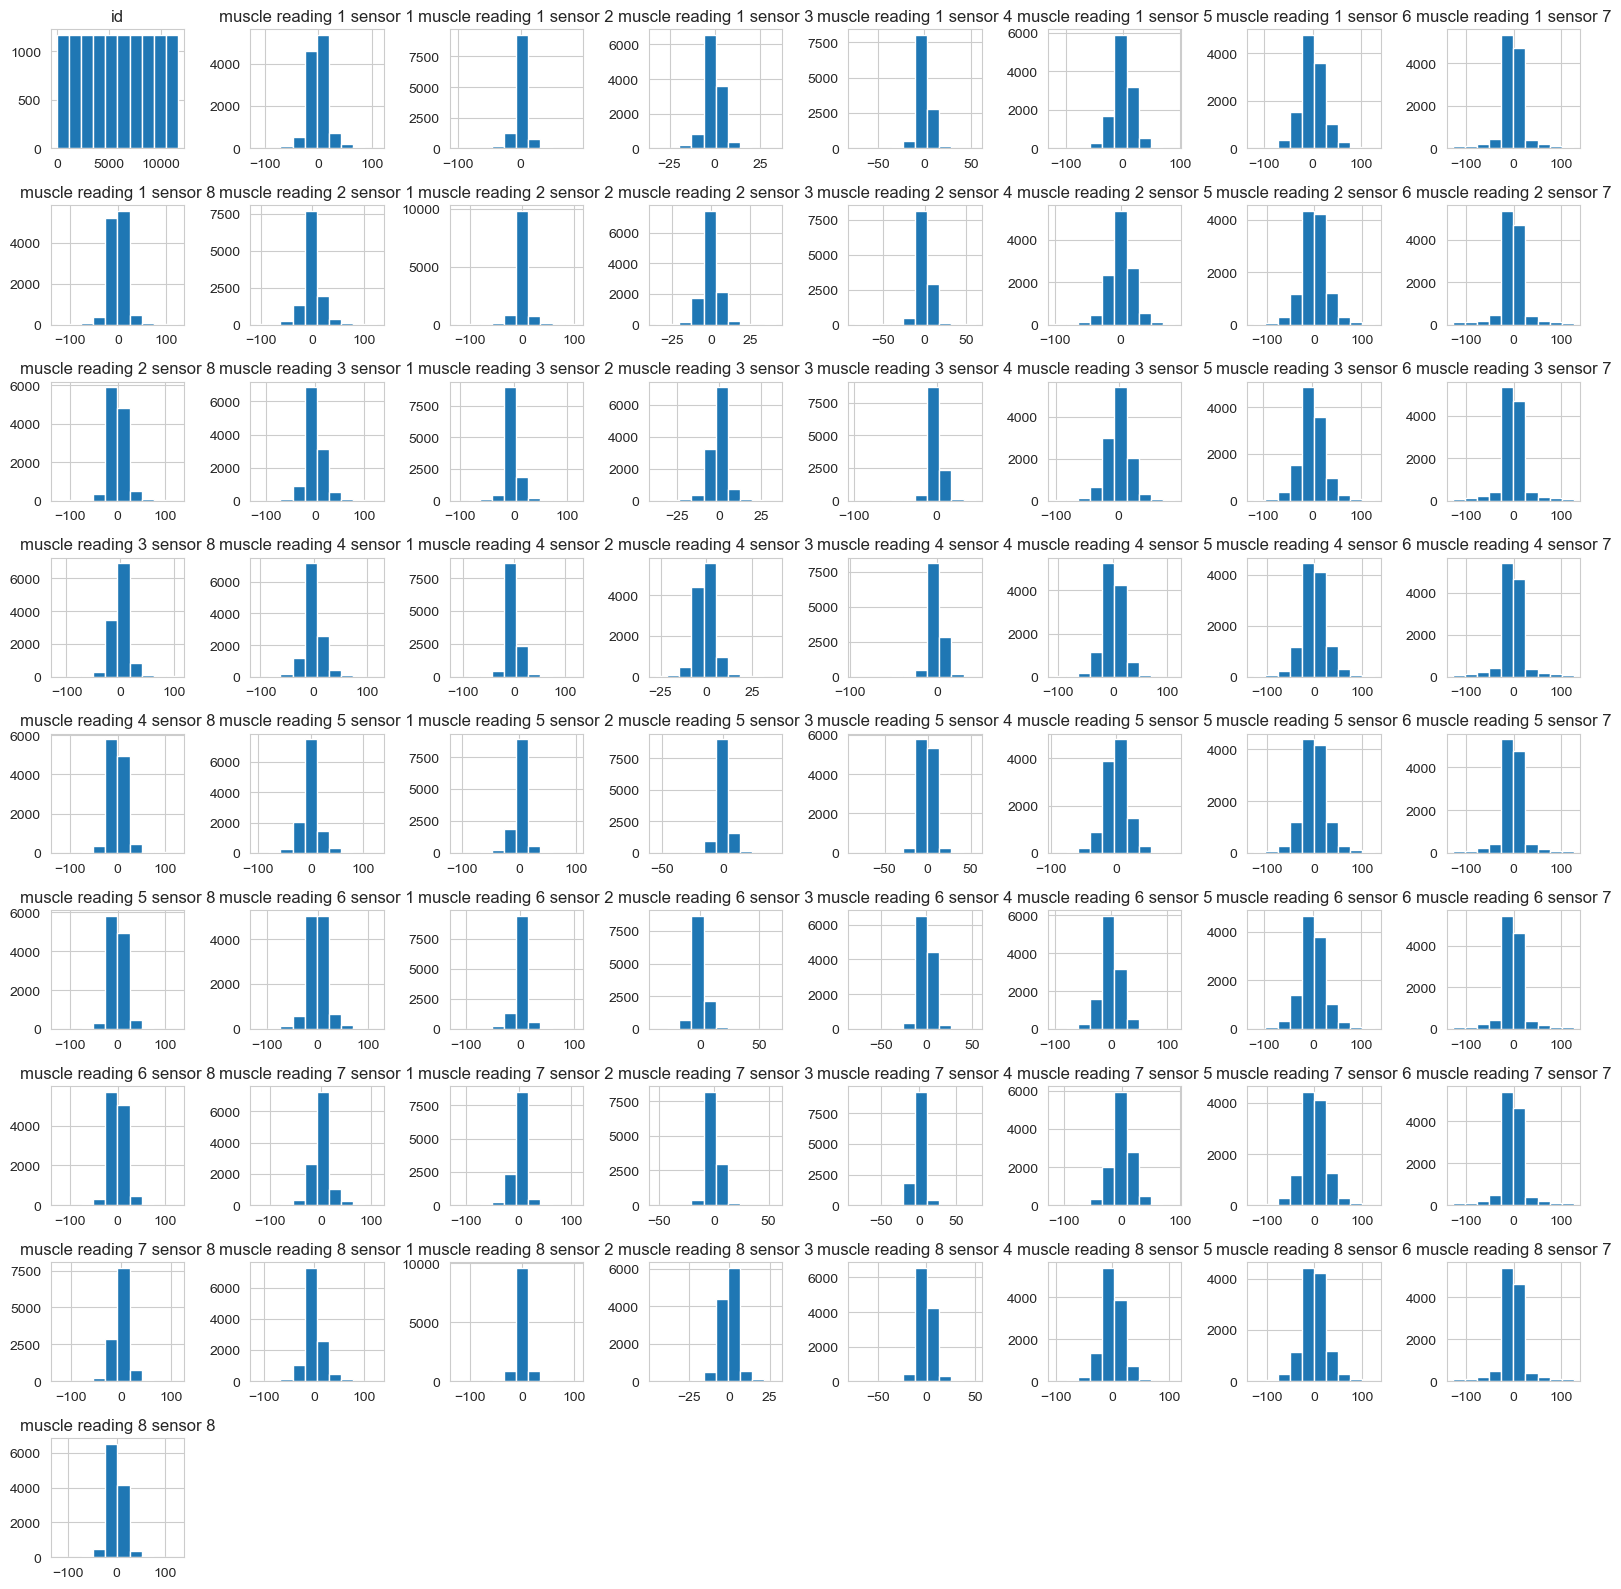

In [20]:
df.hist(figsize=(16, 16))
plt.tight_layout()
plt.show()

#### Get the number of classes in the target vector

In [21]:
target_df[target_attr].nunique()

4

#### Time to run script

In [22]:
end = time.time()
print(f'script run time: {(end - start)/60} minutes')

script run time: 0.07464698155721029 minutes
